In [11]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

import matplotlib.pyplot as plt

In [2]:
#data = np.array([90, 78, 181, 79, 78, 76, 55, 82, 84, 58, 102])
#data = np.array([105, 144, 148, 150, 118, 179, 120, 156, 147, 87, 133, 83, 158, 109, 288, 94, 104, 118, 195, 170, 97, 123, 116, 119, 120, 130, 139, 136, 120, 118, 108, 199, 112, 106, 111, 131])
#data = np.array([185, 227])
data = np.array([98, 150, 133, 193])
# Estimate parameters
mu = np.mean(data)
sigma = np.std(data, ddof=1)
degrees_of_freedom = len(data) - 1
t_score = stats.t.ppf(0.975, degrees_of_freedom) # 95% confidence
z = norm.ppf(0.975)  # 95% confidence

n = len(data)

ci_lower = mu - z * (sigma / np.sqrt(n))
ci_upper = mu + z * (sigma / np.sqrt(n))

ci_lower, ci_upper

(104.82277040567706, 182.17722959432294)

In [3]:
indian_males_shoesizes_sample = np.array([8.6, 7.4, 9.1, 11.3, 8.4, 8.4, 11.5, 9.5, 7.0, 8.7,
 7.0, 7.0, 8.1, 5.8, 6.3, 7.6, 6.8, 8.3, 7.0, 6.3,
 10.8, 8.4, 8.8, 6.3, 7.6, 8.2, 6.7, 8.3, 7.6, 8.0,
 7.6, 11.6, 8.5, 6.5, 9.3, 6.5, 8.5, 5.8, 6.3, 8.2,
 9.5, 8.4, 7.4, 8.2, 6.2, 7.7, 7.0, 9.9, 8.3, 6.3,
 8.2, 7.5, 7.2, 9.1, 9.8, 9.5, 7.0, 7.8, 8.5, 9.6,
 7.5, 7.7, 6.8, 6.7, 9.1, 10.7, 8.1, 9.7, 8.6, 7.2,
 8.6, 10.9, 8.1, 10.8, 4.4, 9.3, 8.6, 7.9, 8.6, 5.4,
 8.2, 8.6, 10.8, 7.7, 7.0, 7.9, 9.5, 8.5, 7.6, 8.7,
 8.3, 9.6, 7.1, 7.8, 7.5, 6.1, 8.4, 8.7, 8.4, 8.0]
)

In [4]:
# Descriptive statistics
sample_mean = np.mean(indian_males_shoesizes_sample)
sample_std = np.std(indian_males_shoesizes_sample)
sample_size = len(indian_males_shoesizes_sample)

print('''
Sample mean: {}
Sample STD: {}
Sample size: {}
'''.format(sample_mean, sample_std, sample_size))


Sample mean: 8.118
Sample STD: 1.359439590419523
Sample size: 100



In [5]:
# MLE estimates of the parameters
mu = sample_mean
sigma = sample_std

# Calculate the z-scores
z_1 = (10.5 - mu) / sigma
z_2 = (11.5 - mu) / sigma

# Find the proportion of the population between 11.5 and 10.5
proportion_1 = stats.norm.cdf(z_1)
proportion_2 = stats.norm.cdf(z_2)
proportion = proportion_2 - proportion_1

# Calculate the number of individuals between 11.5 and 10.5
numer_size11 = proportion * 100000
numer_size11

3344.3363910050093

(array([   35.,   447.,  3494., 14106., 29281., 30715., 16629.,  4589.,
          651.,    53.]),
 array([7.53679859, 7.65137369, 7.7659488 , 7.88052391, 7.99509901,
        8.10967412, 8.22424922, 8.33882433, 8.45339944, 8.56797454,
        8.68254965]),
 <BarContainer object of 10 artists>)

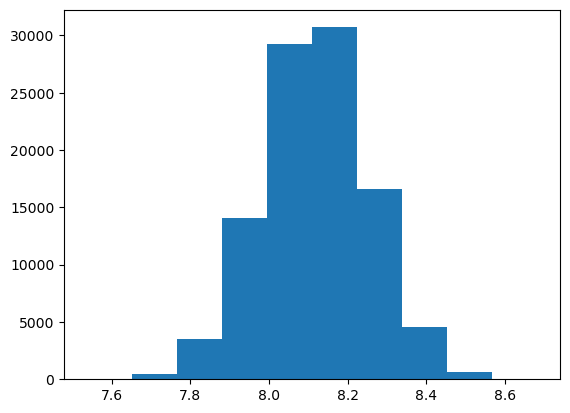

In [19]:
# parametric bootsrap - 
means = []
for _ in range(100000):
    sample = np.random.normal(mu, sigma, 100)
    means.append(sample.mean())
plt.hist(means)

In [21]:
np.array(means).std()

0.13611550300983755

In [37]:
proportion_2

0.006426983320567792

In [49]:
8.12+ 1.7*1.36

10.431999999999999

In [41]:
proportion_1

0.9601296527693821

In [42]:
proportion_2

0.9935730166794322

In [56]:
# MLE estimates of the parameters
a = indian_males_shoesizes_sample.min()
b = indian_males_shoesizes_sample.max()

# Find the proportion of the population between 11.5 and 10.5
proportion_1 = (10.5-a)/(b-a)
proportion_2 = (11.5-a)/(b-a)

proportion = proportion_2 - proportion_1

# Calculate the number of individuals more than 11
numer_size11 = proportion * 100000
numer_size11

13888.888888888896

In [66]:
# MLE estimates of the parameters
lambdaa = len(indian_males_shoesizes_sample)/indian_males_shoesizes_sample.sum()

# Define an array of x values
x_values = np.linspace(0, 13, 10000)  # Adjust the range and number of points as needed


# Find the proportion of the population between 11.5 and 10.5
proportion_1 = stats.expon.cdf(10.5, scale=1/lambdaa)
proportion_2 = stats.expon.cdf(11.5, scale=1/lambdaa)

proportion = proportion_2 - proportion_1

# Calculate the number of individuals more than 11
numer_size11 = proportion * 100000
numer_size11

3179.43971229121

In [64]:
cdf_values

array([0.00000000e+00, 1.60141156e-04, 3.20256668e-04, ...,
       7.98317246e-01, 7.98349544e-01, 7.98381837e-01])

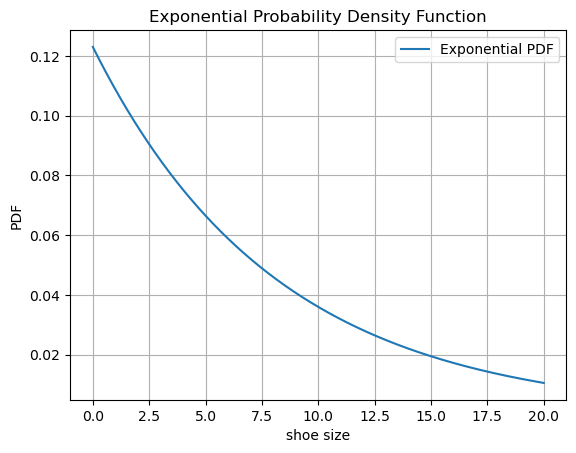

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Define the rate parameter (lambda)
lambda_param = 0.123

# Generate x values
x_values = np.linspace(0, 20, 1000)  # Adjust the range and number of points as needed

# Calculate the PDF values using the expon.pdf() function
pdf_values = expon.pdf(x_values, scale=1/lambda_param)

# Plot the PDF
plt.plot(x_values, pdf_values, label='Exponential PDF')

# Add labels and legend
plt.title('Exponential Probability Density Function')
plt.xlabel('shoe size')
plt.ylabel('PDF')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [73]:
import numpy as np

def power_law_moments_estimate(data):
    x_min = min(data)
    n = len(data)
    
    sample_mean = np.mean(data)
    sample_variance = np.var(data, ddof=1)  # Using ddof=1 for unbiased variance estimator
    
    alpha = 1 + n / (np.sum(np.log(data / x_min)) - n * (sample_mean / x_min))
    
    return alpha

# Example data
data = np.array([1.2, 2.3, 3.4, 4.5, 5.6])

# Estimate alpha using method of moments
alpha_moments = power_law_moments_estimate(indian_males_shoesizes_sample)

print("Method of moments estimate of alpha:", alpha_moments)


Method of moments estimate of alpha: 0.19791011625497812


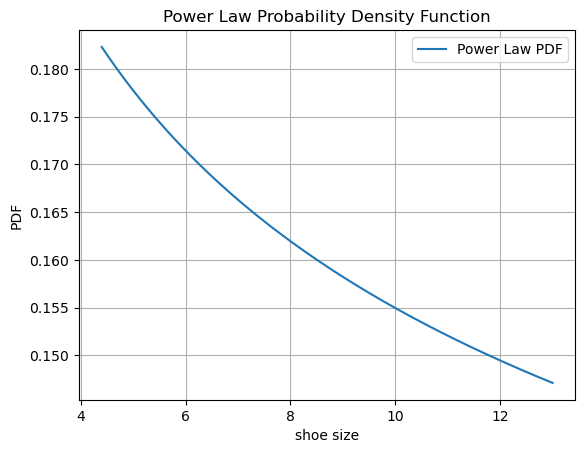

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def power_law_pdf(x, alpha, x_min):
    return (1-alpha) / x_min * (x / x_min)**(-alpha)

# Define the estimated parameters
alpha = power_law_moments_estimate(indian_males_shoesizes_sample)  # Estimated scaling parameter
x_min = min(indian_males_shoesizes_sample)  # Minimum value in the dataset

# Generate x values
x_values = np.linspace(x_min, 13, 1000)  # Adjust the range as needed

# Calculate the PDF values
pdf_values = power_law_pdf(x_values, alpha, x_min)

# Plot the PDF
plt.plot(x_values, pdf_values, label='Power Law PDF')

# Add labels and legend
plt.title('Power Law Probability Density Function')
plt.xlabel('shoe size')
plt.ylabel('PDF')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [79]:
import scipy as sp

# Calculate the proportion using integration (trapezoidal rule)
def proportion_between(x_min, lower_bound, upper_bound, alpha):
    integral, _ = sp.integrate.quad(power_law_pdf, lower_bound, upper_bound, args=(alpha, x_min))
    return integral

proportion = proportion_between(x_min, 10.5, 11.5, alpha)
proportion*100000

15207.208084186685

In [22]:
100+90+80+70+60+50+40+30+20+10

550

In [23]:
550/10

55.0

In [27]:
pop = np.ones(10)
for i in range(2,11):
    pop = np.append(pop, np.ones(10)*i)

In [144]:
n = 30
sample = np.random.choice(pop, size=n)
sample

array([ 4.,  8.,  3.,  5.,  3.,  7.,  5.,  5.,  3.,  8.,  3.,  3.,  9.,
       10., 10.,  3.,  3.,  6.,  6.,  8.,  8.,  8.,  2., 10.,  4.,  2.,
        9.,  2.,  7.,  4.])

In [125]:
pop.mean()

5.5

In [126]:
sample.std()

4.0

In [127]:
ci_l = sample.mean() - 12.7*sample.std()/np.sqrt(2)
ci_u = sample.mean() + 12.7*sample.std()/np.sqrt(2)

print("{} - {}".format(round(ci_l,1), round(ci_u,1)))

-30.9 - 40.9


In [128]:
(pop.mean() >= ci_l) & (pop.mean() <= ci_u)

True

In [553]:
n = 100
t = 1.96
#t = 12.706 #n=2
#t = 4.303 #n=3
#t = 3.184 #n=4
#t = 2.228 #n=10

count = 0
cvs_plus = []
cvs_minus = []
n_sim = 10000
good_rejects = []
bad_rejects = []
for _ in range(n_sim):
    sample = np.random.choice(pop, size=n)
    ci_l = sample.mean() - t*sample.std()/np.sqrt(n-1)
    ci_u = sample.mean() + t*sample.std()/np.sqrt(n-1)
    if (pop.mean() >= ci_l) & (pop.mean() <= ci_u):
        count=count+1
        cvs_plus.append(sample.std()/pop.std())
    else:
        sampling_dist_std = pop.std()/np.sqrt(n)
        ci_l_samplingdist = pop.mean() - 1.96*sampling_dist_std
        ci_u_samplingdist = pop.mean() + 1.96*sampling_dist_std
        if (sample.mean() >=  ci_l_samplingdist) & (sample.mean() <=  ci_u_samplingdist): #ideally should not fail
            bad_rejects.append(sample)
            cvs_minus.append(sample.std()/pop.std())
            continue
        good_rejects.append(sample)

In [554]:
(count/n_sim)*100

94.86

In [555]:
cvs_minus

[0.9111497897678184,
 0.9261454823867872,
 0.8962886439832503,
 0.9608329719571451,
 0.9557735245878233,
 0.971565434718318,
 0.9482615672903759,
 0.9118479405397958,
 0.9320879136582979,
 0.9339651541095682,
 0.9758539384000606,
 0.9620936765327182,
 0.9808098076527778,
 0.9288898554922232,
 0.9627926552325257,
 0.9820448672092948,
 0.9658659170386796,
 0.8786973830102666,
 0.9506871518044517,
 0.9455734191003314,
 0.9832783754544608,
 0.9758539384000606,
 0.9583065872420556,
 0.941719896591531,
 0.8777657587720811,
 0.9116352274231114,
 0.9222107824530829,
 0.9424339861135198,
 0.9577435602877877,
 0.9248357757576273,
 0.9256676542153809,
 0.9164556230887063,
 0.9063011741037403,
 0.914423149843494,
 0.9392711552210592,
 0.9424339861135198,
 0.9658659170386797,
 0.8653883346203424,
 0.9671200608617382,
 0.8724469246685648,
 0.9243572705595837,
 0.9430061537766369,
 0.9353916697071745,
 0.9557735245878233,
 0.9665621678104438,
 0.9627926552325257,
 0.9391420972291035,
 0.9261454823867

In [556]:
len(good_rejects)

446

In [557]:
len(cvs_minus)

68

In [558]:
sample = bad_rejects[0]
ci_l = sample.mean() - t*sample.std()/np.sqrt(n-1)
ci_u = sample.mean() + t*sample.std()/np.sqrt(n-1)

In [559]:
ci_l

5.51446847513337

In [533]:
ci_u

10.251427991297968

In [534]:
(pop.mean() >= ci_l) & (pop.mean() <= ci_u)

False

In [535]:
bad_rejects[0]

array([ 7.,  8., 10.,  7.])

In [536]:
bad_rejects[0].mean()

8.0

In [537]:
bad_rejects[0].std()

1.224744871391589

In [538]:
ci_l_samplingdist

2.685164303196366

In [539]:
ci_u_samplingdist

8.314835696803634

In [540]:
pop.std()

2.8722813232690143

In [541]:
cvs_plus

[1.3568010505999364,
 0.7977240352174656,
 0.9003366373785201,
 0.7929614610987591,
 0.7929614610987591,
 0.8660254037844386,
 0.816496580927726,
 0.996204919895622,
 0.30151134457776363,
 0.6215815605080611,
 0.8660254037844386,
 0.7385489458759963,
 0.9045340337332909,
 0.937436866561092,
 1.334279966987075,
 0.9333874443188751,
 0.49236596391733095,
 1.0552897060221726,
 0.778498944161523,
 0.7177405625652734,
 0.7537783614444091,
 0.7385489458759963,
 0.830297500534561,
 0.5707517636920413,
 0.6215815605080611,
 1.2431631210161223,
 1.0,
 1.0150384378451047,
 0.7977240352174656,
 1.1677484162422844,
 0.830297500534561,
 0.9333874443188751,
 1.164500152881315,
 0.6030226891555273,
 1.164500152881315,
 0.7929614610987591,
 1.2185435916898848,
 1.2792042981336627,
 0.8876253645985945,
 1.0298573010888745,
 0.3793934553196641,
 0.830297500534561,
 0.937436866561092,
 0.9003366373785201,
 1.4142135623730951,
 0.9534625892455924,
 0.6685579234215214,
 0.6215815605080611,
 1.0730867399773